# 2월 3일

시드(seed)란? 
시드는 랜덤 숫자를 생성할 때 사용되는 초기값이다. 
시드를 고정하면 실행할 때마다 같은 랜덤 값을 생성할 수 있음. 

딥러닝에서는 랜덤성이 있는 연산이 많음. 
ex) shuffle= True 
모델의 가중치를 랜덤하게 초기화
데이터 증강(augmentation)

랜덤 시드를 고정하면 재현가능성 보장

In [1]:
#pytorch에서 시드 고정하는 방법 

import torch
import numpy as np
import random

seed = 42 # 시드값 생성

#pytorch 시드 고정 
torch.manual_seed(seed)

#numpy
np.random.seed(seed)

#python 기본 
random.seed(seed)

# 파이토치 GPU 사용시
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed) #multi-gpu

# 5. PyTorch 연산 결과를 더 결정적으로 만들기 (완전 고정)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

/home/choi/anaconda3/envs/robodiff/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


위와 같이 실행하면 실행 할 때마다 결과가 같음 
시드가 없으면 어떤 문제가 발생하는지 아래확인

In [2]:
import torch

x = torch.randn(3)
print(x) # 실행할 때 마다 숫자가 다름 그래서 실험을 재현할 수 없음

tensor([0.3367, 0.1288, 0.2345])


시드 고정 후 실행

In [6]:
import torch

torch.manual_seed(42)  # 시드 고정 보통 42를 가장 많이 사용한다.

x = torch.randn(3)
print(x)  # 실행할 때마다 값이 동일!

tensor([0.3367, 0.1288, 0.2345])


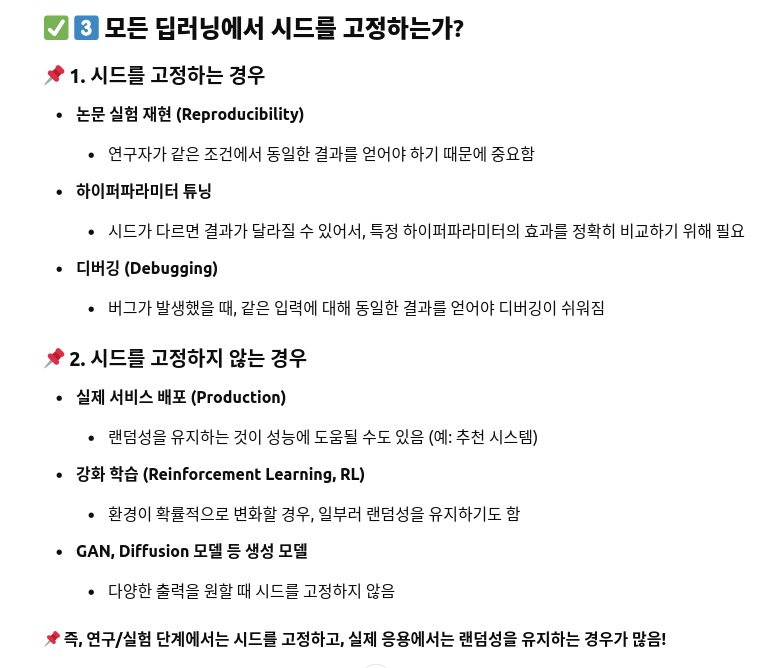

# 2 
### 왜 변수 타입을 미리 지정할까? type annotation을 하는 이유는?
self.model: DiffusionUnetLowdimPolicy 

self.model = hydra.utils.instantiate(cfg.policy)  # 모델 인스턴스화

가독성 향상, 정적 타입 체크. IDE 자동완성 지원 때문에 사용함. 
self.model: DiffusionUnetLowdimPolicy
이 변수가 어떤 타압의 객체인지 미리 명확하게 알려줌, 특히 딥러닝 모델처럼 복잡한 클래스에서는 타입을 명확하게 알면 코드 이해가 쉬워짐.

# 3
ema에 관하여

EMA(지수 이동 평균, exponential moving average) 이전 값들보다 최근 값에 더 많은 가중치를 부여하는 평균 계산 방법.

모델의 weight를 부드럽게 업데이트하여 안정적인 학습을 지원
딥러닝에서 모델의 파라미터를 부드럽게 추적하여 일반화 성능을 향상시키는 역할



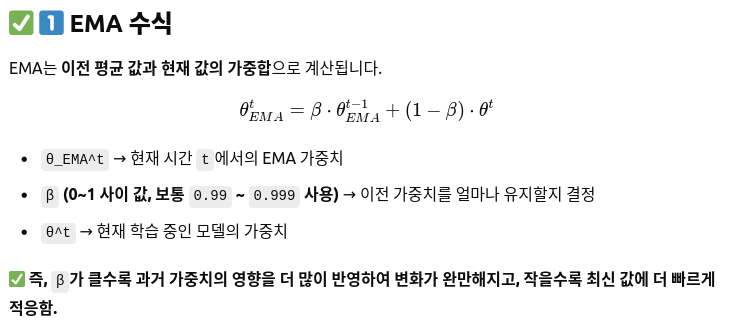

ema를 적용하였을 때, 이전 가중치들을 활용하여 가중치 변화를 부드럽게 만듦, 학습이 끝난후, EMA 가중치를 최종 모델 가중치로 사용하면 더 나은 일반화 성능을 보일 가능성이 높음

조금 헷갈릴 수 도 있는데 
기본적으로 딥러닝의 기본구성은 1. 손실함수, 2. 옵티마이저(손실 함수의 값을 최소화 하기 위해 가중치 업데이트), 3. 학습률 스케줄러, 4. EMA(지수이동평균) 학습 중 모델의 가중치를 부드럽게 유지, 옵티마이저가 가중치를 급격하게 변경하면, EMA가 이를 완화하여 더 안정적인 학습을 지원

즉, 옵티마이저와 EMA는 역할이 다름
EMA는 옵티마이저가 업데이트한 가중치들을 평활화 하여 더 나은 가중치
옵티마이저 모델의 가중치를 직접 업데이트

옵티마이저(Optimizer) → 운동 선수
→ 경기를 하면서 실력을 향상(가중치 업데이트)
EMA → 경기 성적 평균
→ 최근 경기보다 전체적인 성적을 더 중요하게 반영 (부드럽게 변화)


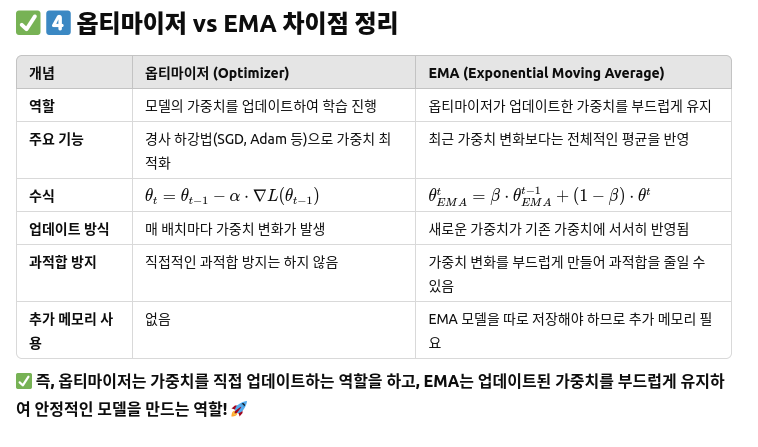

# 4 copy.copy() vs copy.deepcopy()

Python에서 객체를 복사하는 방법에는 두 가지가 있음:

    얕은 복사(Shallow Copy) → copy.copy()
    깊은 복사(Deep Copy) → copy.deepcopy()

copy.copy() 은 원본 객체의 참조만 복사, 리스트나 딕셔너리 같은 중첩된 구조를 가지는 객체는 내부 요소까지 완전히 복사되지 않음, 중첩 리스트의 경우 원본과 공유가 가능

copy.deepcopy() 객체의 모든 속성을 완전히 새로운 복사본으로 생성하여, 원본과 독립적으로 동작함.
내부 리스트, 딕셔너리까지 완전히 새로운 메모리 공간에 복사됨.

보통 EMA 모델을 만들 때 사용한다

# 5 Cosine Annealing 스케줄 적용

학습률을 코사인 곡선 형태로 감소 
500 스텝 이후 점진적으로 감쇠


코사인 형태로 감소 인데, cosine annealing이 근러면 초반에는 천천히 감소하고, 후반부로 갈수록 빠르게 감소하는 특징이 있음. 


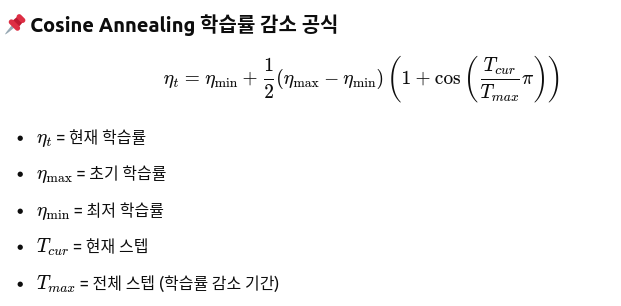

코사인 어닐링(cosine Annealing)은 학습률 LR 코사인 함수 형태로 점진적으로 감소시키는 학습률 스케줄링 기법.

1) 고정 학습률 
- 학습률이 일정 -> 최적점에 빠르게 도달할 수 있지만, 학습이 불안정할 수 있음

2) step decay
- 일정한 단계마다 학습률 감소 -> 초반 학습률 감소가 너무 빠를 수 있음.

3) 지수 감소
- exponetial 함수로 감소-> 초반 학습률 감소가 너무 빠를 수 있음

4) 코사인 어닐링
- 학습률을 코사인 함수 형태로 감소 -> 부드럽게 최적점으로 수렴 가능

# .item() 

- pytorch의 tensor 객체에서 단일 숫자 값을 추출하는 함수이다. 
tensor을 python의 float 또는 int 타입으로 변환하고, .item() 을 사용하면 tensor에서 넘파이 배열없이도 다닝ㄹ 스칼라 값을 가져올 수 있다. 

In [1]:
# 예제 

import torch

tensor_value = torch.tensor(5.5)
print(tensor_value) # tensor(5.5000)
print(type(tensor_value)) # <class 'torch.Tensor'> torch.tensor 타입이기 때문에 일반숫자로 사용 x

scalar_value = tensor_value.item()
print(scalar_value) # 5.5
print(type(scalar_value)) # <class 'float'> 일반 숫자로 사용 가능

tensor(5.5000)
<class 'torch.Tensor'>
5.5
<class 'float'>


/home/choi/anaconda3/envs/robodiff/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 예제 2

loss = torch.tensor(0.1234)
log_loss = {"loss": loss} # 오류가 난다. tensor 타입은 dictionary의 key로 사용 불가능
log_loss = {"loss": loss.item()} # 이렇게 사용해야 한다.

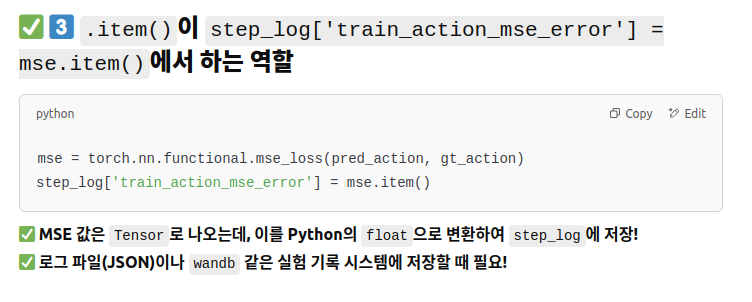

# 2월6 
isinstance(object, classinfo)

object: 검사하고자 하는 객체
classinfo: 객체가 속했는지 확인할 클래스나 튜플

normalizer는 데이터 스케일 통일과 학습의 안정성 및 효율성을 개선

평균을 0, 표준편차를 1로 맞춘다